# Множественная линейная регрессия на чистых данных

Студент: Белянинов Илья Витальевич\
Группа: ПМ22-1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import time

### 1. Самостоятельно постройте парные регрессии от каждого атрибута с целевой переменной.

In [2]:
x = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2_regression/data/0_x.csv",
                header=None, names=('x1', 'x2', 'x3', 'x4', 'x5'))
y = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2_regression/data/0_y.csv",
                header=None)

HTTPError: HTTP Error 404: Not Found

In [4]:
x.head()

,x1,x2,x3,x4,x5
0,0.071841,0.855352,-0.305597,0.028253,1.826895
1,0.139521,-0.423507,0.461059,-0.447400,-0.034988
2,1.626311,-0.257622,-0.697520,1.413219,1.086292
3,-1.183233,-0.826343,0.073047,-0.639690,-0.503273
4,-0.783365,-0.861232,0.951448,-0.117306,0.680597


In [5]:
y.head()

,0
0,63.320498
1,-23.426394
2,11.982771
3,-102.883304
4,-49.373475


In [6]:
x.shape, y.shape

((387, 5), (387, 1))

In [7]:
pd.DataFrame(x.x1).columns[0]

'x1'

In [8]:
def lin_regr_draw(X, Y):
    X = pd.DataFrame(X)
    binary = LinearRegression()
    binary.fit(X, Y)
    y_pred = binary.predict(X)
    
    xx = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    
    fig, ax = plt.subplots(figsize=(8, 3))
    plt.title('Парная регрессия')
    plt.xlabel(X.columns[0])
    plt.ylabel('Y')

    plt.scatter(X, Y)

    plt.plot(xx, binary.predict(xx), c='r')
    
    print('R^2: {:.4f}'.format(binary.score(X, Y)))
    plt.show()

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


R^2: 0.0436


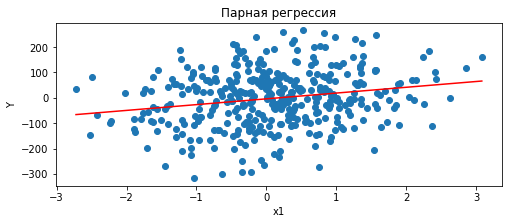

In [9]:
lin_regr_draw(x['x1'],y)

R^2: 0.7700


C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


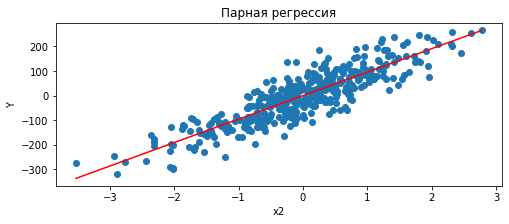

In [10]:
lin_regr_draw(x['x2'],y)

R^2: 0.1879


C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


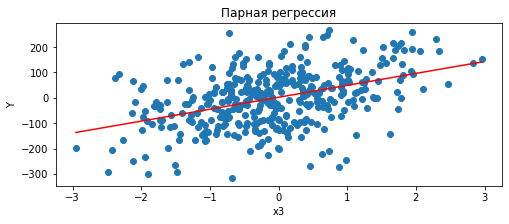

In [11]:
lin_regr_draw(x['x3'],y)

R^2: 0.0475


C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


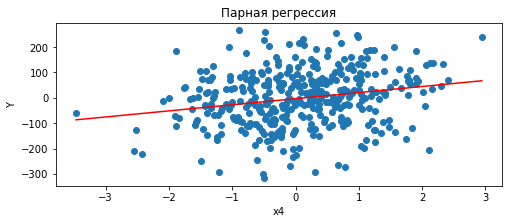

In [12]:
lin_regr_draw(x['x4'],y)

R^2: 0.0002


C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


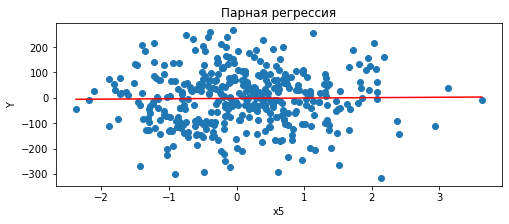

In [13]:
lin_regr_draw(x['x5'],y)

### 2. (*) Модифицируйте код из предыдущей работы так, чтобы модель регрессии умела работать с входными данными, состоящими из произвольного количества столбцов.

In [14]:
class Model(object):
    """Модель линейной регрессии"""
    def __init__(self):
        self.model = LinearRegression()

    def prediction(self, X):
        return self.model.predict(X)
    
    def error(self, X, Y):
        Y_pred = self.prediction(X)
        return (mean_squared_error(Y, Y_pred, squared=False))
    
    def fit(self, X, Y):
        self.model.fit(X, Y)

    def plot(self, X, Y, title="График линейной регрессии"):
        plt.figure(figsize=(8, 6))
        YY = self.prediction(X)
        plt.scatter(YY, Y, color='b')
        plt.plot(YY, YY, color='r')
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.title(title)
        plt.show()

In [15]:
mod = Model()
mod.fit(x,y)
XX = mod.prediction(x)
XX

array([[ 7.05121289e+01],
       [-3.35064762e+01],
       [ 2.01171874e+01],
       [-1.12268539e+02],
       [-6.05209679e+01],
       [ 1.70001202e+02],
       [-5.85326595e+00],
       [-1.39665837e+01],
       [ 8.31576852e+01],
       [-1.48011865e+02],
       [-9.54136279e+01],
       [ 2.86871685e+01],
       [-3.92582036e+01],
       [ 4.04829250e+01],
       [-1.22527045e+00],
       [ 1.79557091e+02],
       [-1.13499929e+02],
       [-5.05287708e+01],
       [-4.43234474e+01],
       [ 1.05874218e+01],
       [ 4.95537969e+00],
       [-3.79754204e+01],
       [-5.49339122e+01],
       [-1.09065650e+02],
       [ 9.85719644e+01],
       [-1.45751699e+01],
       [ 9.39803448e+01],
       [ 1.89883312e+02],
       [-5.89990153e+00],
       [-1.82840745e+02],
       [-3.46844168e+01],
       [ 1.62957898e+02],
       [ 5.43879015e+01],
       [-6.99187854e+01],
       [-1.62365423e+02],
       [-3.53606249e+01],
       [-4.18316061e+01],
       [-1.07279780e+02],
       [ 6.7

In [16]:
mod.error(x,y)

9.669141099416438

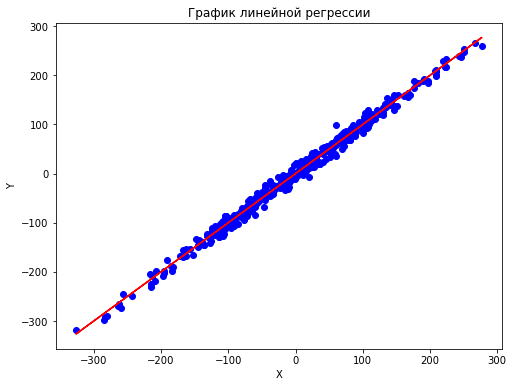

In [17]:
mod.plot(x,y)

### 3. Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго, третьего и десятого порядков. Сделайте вывод о значимости регрессии.

In [77]:
def poly_regr_draw(X, Y, degree=2, name = 'x'):
    poly = PolynomialFeatures(degree=degree)
    X_ = poly.fit_transform(X)

    lin_reg = LinearRegression()
    lin_reg.fit(X_, Y)

    fig, ax = plt.subplots(figsize=(7, 4))
    plt.title(f'Полиномиальная регрессия {degree} порядка')
    plt.xlabel(name)
    plt.ylabel('Y_actual')
    plt.scatter(X, Y)
    plt.plot(X, lin_reg.predict(X_), color='r')
    
    plt.show()

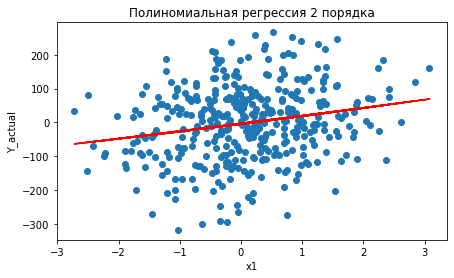

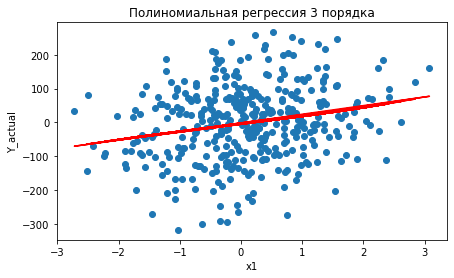

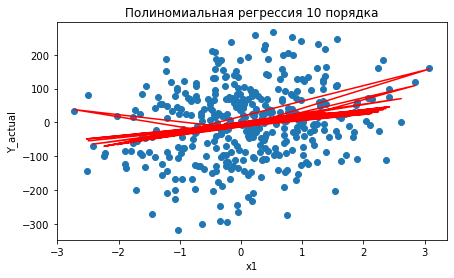

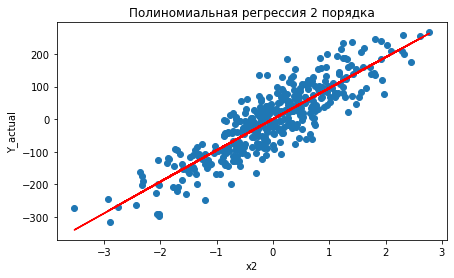

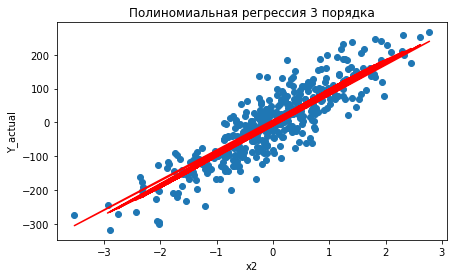

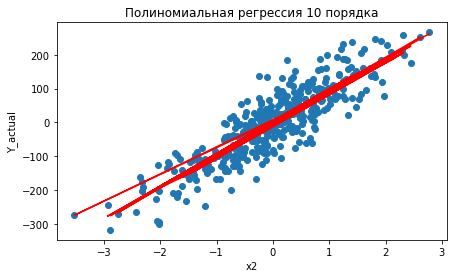

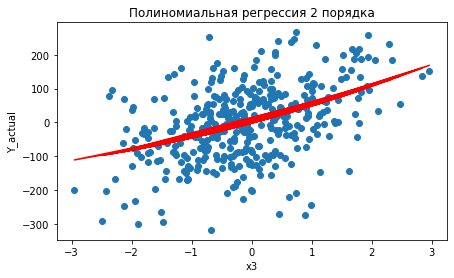

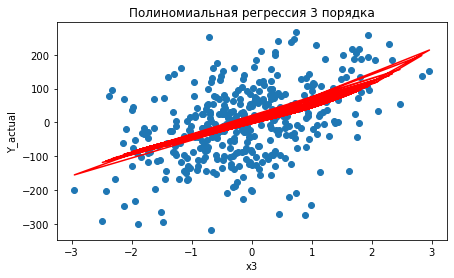

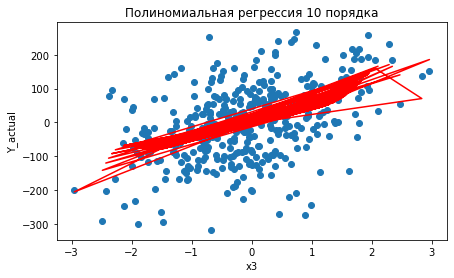

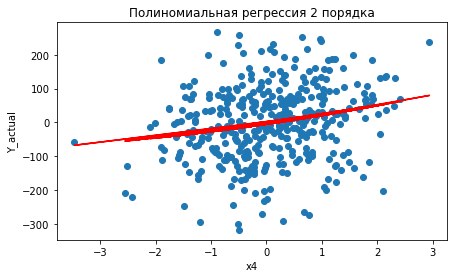

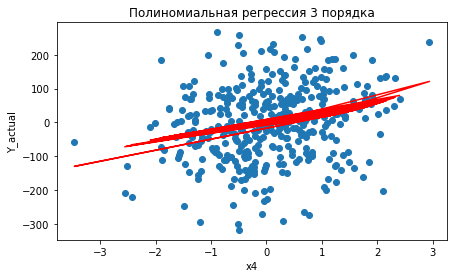

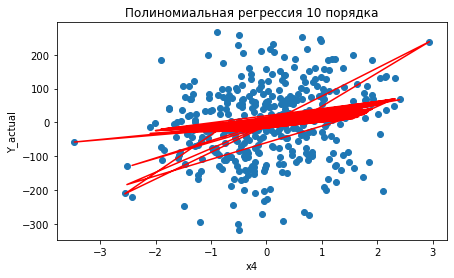

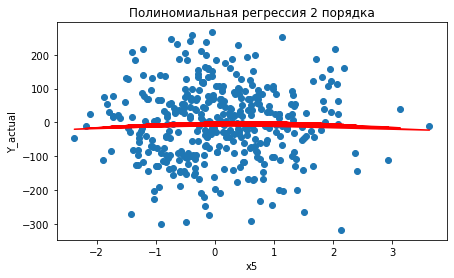

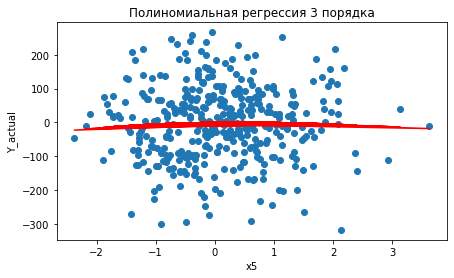

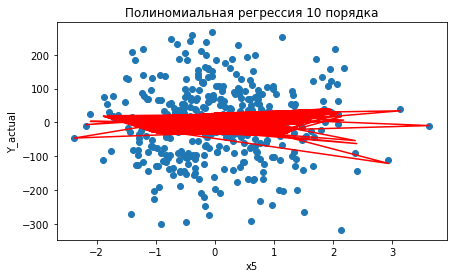

In [78]:
for x_name in x.columns:
    for degree in [2,3,10]:
        poly_regr_draw(x[[x_name]].values, y.values, degree, x_name)

### 4. Постройте сводную таблицу показателей точности всех построенных моделей. Сделайте вывод, какие модели переобученнные, какие - недообученные.

### 5. Используйте другие метрики качества регрессионной модели в дополнение к коэффициенту детерминации.

In [112]:
def quality_indicators(X, Y, degree):
    poly = PolynomialFeatures(degree=degree)
    X_ = poly.fit_transform(X)
    
    lin_reg = LinearRegression()
    lin_reg.fit(X_, Y)
    
    Y_pred = lin_reg.predict(X_)
    MSE = (mean_squared_error(Y, Y_pred))
    R2 = (r2_score(Y, Y_pred))
    MAE = (mean_absolute_error(Y, Y_pred))
    RMSE = (mean_squared_error(Y, Y_pred, squared=False))
    return R2, MAE, MSE, RMSE

In [113]:
models_table = pd.DataFrame(columns=['Name','Degree','R^2','MAE', 'MSE', 'RMSE'])
models_table

,Name,Degree,R^2,MAE,MSE,RMSE


In [114]:
for x_name in x.columns:
    for degree in [2,3,10]:
        model = quality_indicators(x[[x_name]].values, y.values, degree)
        new_model = pd.DataFrame({'Name':[x_name],'Degree':[degree],
                     'R^2':[model[0]],'MAE':[model[1]],
                     'MSE':[model[2]], 'RMSE':[model[3]]})
        models_table = pd.concat([models_table, new_model], ignore_index = True)

In [115]:
models_table

,Name,Degree,R^2,MAE,MSE,RMSE
0,x1,2,0.043672,85.778988,11491.909255,107.200323
1,x1,3,0.043765,85.684404,11490.787323,107.19509
2,x1,10,0.050356,84.854224,11411.58652,106.825028
3,x2,2,0.769994,42.132303,2763.909753,52.572899
4,x2,3,0.771118,42.061248,2750.401156,52.444267
5,x2,10,0.772677,41.690871,2731.672893,52.265408
6,x3,2,0.190008,77.458415,9733.431563,98.658155
7,x3,3,0.192802,77.5702,9699.859735,98.487866
8,x3,10,0.204409,76.815422,9560.372197,97.777156
9,x4,2,0.047943,83.446884,11440.588266,106.960686


### 6. Замерьте время обучения полиномиальных моделей с разной степенью полинома. Сделайте вывод.

In [140]:
def model_time(X, Y, degree, name):
    t_start = time.time()
    poly = PolynomialFeatures(degree=degree)
    X_ = poly.fit_transform(X)
    t_end = time.time()
    print(f'{name} - degree: {degree}, time: {t_end-t_start}')

In [141]:
for degree in range(1, 21):
        model_time(x.values, y.values, degree, 'x')

x - degree: 1, time: 0.0010001659393310547
x - degree: 2, time: 0.0010001659393310547
x - degree: 3, time: 0.0009984970092773438
x - degree: 4, time: 0.0019998550415039062
x - degree: 5, time: 0.0010001659393310547
x - degree: 6, time: 0.001001119613647461
x - degree: 7, time: 0.0029976367950439453
x - degree: 8, time: 0.0040013790130615234
x - degree: 9, time: 0.006995439529418945
x - degree: 10, time: 0.009999990463256836
x - degree: 11, time: 0.012996673583984375
x - degree: 12, time: 0.016014814376831055
x - degree: 13, time: 0.02099132537841797
x - degree: 14, time: 0.028993606567382812
x - degree: 15, time: 0.03797721862792969
x - degree: 16, time: 0.06598854064941406
x - degree: 17, time: 0.09198474884033203
x - degree: 18, time: 0.07998967170715332
x - degree: 19, time: 0.0949869155883789
x - degree: 20, time: 0.09697651863098145


In [4]:
#Мега модель

class linear_reg:
    def __init__(self):
        self.w0 = 0
        self.eps = 1e-4
        self.wi = np.array([])

    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))

    def predict(self, X):
        return X @ self.wi + self.w0

    def fit(self, X, Y, alpha=1, max_steps=50000):
        X = np.array(X)
        Y = np.array(Y)
        self.wi = np.array([0.0] * X.shape[1])
        step = 0
        steps, errors = [], []
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) / X.shape[0]
            dJ1 = X.T @ (self.predict(X) - Y) / X.shape[0]
            self.w0 -= alpha * dJ0
            self.wi -= alpha * dJ1
            new_err = self.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
#             if step > 1 and abs(errors[step - 1] - errors[step - 2]) < self.eps:
#                 print('Модель перестала обучаться')
#                 break
        else:
            print('Модель обучилась успешно. Количество шагов закончилось.')

        return steps, errors